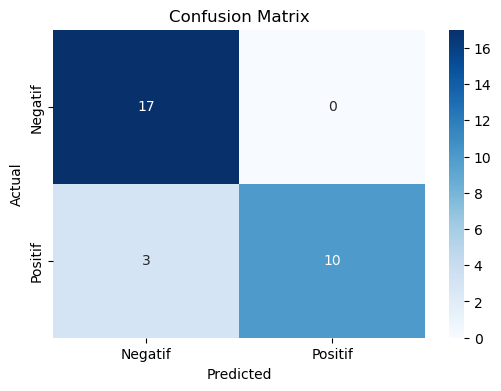

Confusion Matrix:
 [[17  0]
 [ 3 10]]

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.85      1.00      0.92        17
     Positif       1.00      0.77      0.87        13

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.91      0.90      0.90        30



In [33]:
import pandas as pd
import matplotlib.pyplot as plt     # ← penting!
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# =======================
# Load dataset
# =======================
df = pd.read_csv("dataset_review_toko_online.csv")

# =======================
# Pisahkan fitur dan label
# =======================
X = df[["Murah", "Cepat", "Puas"]]
y = df["Label"]

# =======================
# Split data untuk training dan testing
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# =======================
# Buat model Naive Bayes Gaussian
# =======================
model = GaussianNB()
model.fit(X_train, y_train)

# =======================
# Prediksi dan evaluasi
# =======================
y_pred = model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["Negatif", "Positif"])

# =======================
# Visualisasi Confusion Matrix
# =======================
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Tampilkan confusion matrix
plot_confusion_matrix(cm, ["Negatif", "Positif"])

# Cetak Confusion Matrix dan Classification Report
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
